In [1]:
from google.colab import files

uploaded = files.upload()

Saving TestData2.csv to TestData2.csv
Saving TrainData2.csv to TrainData2.csv
Saving ValData2.csv to ValData2.csv


In [0]:
# data analysis for MUSIC data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import savetxt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 9

# extra added for using inbuilt sigmoid

from scipy.special import expit

In [0]:
op_cases = 1
train_df = pd.read_csv("TrainData2.csv")
data_t = train_df.to_numpy()
x_train = data_t[:,0:29]
y_train = data_t[:,29:39]

val_df = pd.read_csv("ValData2.csv")
data_v = val_df.to_numpy()
x_val = data_v[:,0:29]
y_val = data_v[:,29:39]

test_df = pd.read_csv("TestData2.csv")
data_te = test_df.to_numpy()
x_test = data_te[:,0:29]
y_test = data_te[:,29:39]

In [0]:
#cost function for logistic regression
def costFunction(X,y,theta,lam):
    m=X.shape[0]
    prod=np.zeros((X.shape[0],theta.shape[1]))
    
    prod=X.dot(theta)
    #print(prod)
    h=1/(1+np.exp(-prod))
    J = (-1/m)*np.sum( y*np.log(h +1e-20) + (1-y)*np.log(1-h +1e-20)) + (lam/(2*m))*((np.sum(theta))-np.sum(theta[0,:]));
    return [J,h]

In [0]:
# gradient descent algorithm
def grad_descent_vec(X,y,theta,lam,max_itr,alpha):
    m=X.shape[0]
    J_hist=np.zeros((max_itr,1))
    for i in range(max_itr):
        [J,h]=costFunction(X,y,theta,lam)
        dif = h-y
        theta = theta - (alpha/m)*((X.T).dot(dif))
        J_hist[i]=J
    return [theta,J_hist]

In [0]:
def learning_curve(xT,xV,yT,yV,theta,lam):
    ma=yV.shape[0]
    J_t_error = np.zeros((ma-1,1))
    J_v_error = np.zeros((ma-1,1))
    for i in range(2,ma+1):
        [J_t_error[i-2],h] = costFunction(xT[0:i-1,:], yT[0:i-1,:], theta, lam)
        [J_v_error[i-2],h] = costFunction(xV[0:i-1,:], yV[0:i-1,:], theta, lam)
    i=np.arange(1,ma,1)
    #print(J_t_error,J_v_error)
    plt.plot(i,J_t_error,label='Train Error')
    plt.plot(i,J_v_error,label='Validation Error')
    plt.legend(loc='upper left')
    plt.title('learning curve')
    plt.show()

In [0]:
# the function to find degree for best results. 
def lc_degree(d_max,xT,xV,yT,yV,lam,max_itr,alpha,col):
    power=1
    alpha =.1
    max_itr = 10000
    ma=yV.shape[0]
    J_t_error = np.zeros((d_max,1))
    J_v_error = np.zeros((d_max,1))
    for i in range(d_max):
        initial_theta = np.ones((xT.shape[1],yT.shape[1]))
        [theta,j_hist] = grad_descent_vec(xT, yT, initial_theta,lam, max_itr, alpha)    
        [J_t_error[i],h] = costFunction(xT[0:ma,:], yT[0:ma,:], theta, lam)
        [J_v_error[i],h] = costFunction(xV, yV, theta, lam)
        
        [J,h_train]=costFunction(xT, yT, theta,0)

        h_train,acc=prediction(h_train,yT)
        print("\naccuracy (train):  ",acc)

        [J,h_test]=costFunction(xV, yV, theta,0)

        h_test,acc=prediction(h_test,yV)
        print("\naccuracy:  ",acc)
        
        fact = normalise_fact( np.append(np.power(xT,i+1) , np.power(xV,i+1),axis=0) )
        #fact=1
        powT = (np.power(xT,i+1))/fact
        powV = (np.power(xV,i+1))/fact
        xT = np.append(xT, powT,axis=1)
        xV = np.append(xV, powV,axis=1)
        j=np.arange(1,10001,1)
        #plt.plot(j,j_hist)
        #plt.show()
        #xT = np.power(xT,i+1) / fact
        #xV = np.power(xV,i+1) / fact
        #print(j_hist[980:1000])
        
    power = np.argmin(J_v_error)
    i=np.arange(1,d_max+1,1)
    plt.plot(i,J_t_error,label='Train Error')
    plt.plot(i,J_v_error,label='Validation Error')
    plt.legend(loc='upper left')
    plt.title(col)
    plt.show()
    return power

def normalise_fact(x):
    Max = np.max(x)
    Min = np.min(x)
    fact = (Max-Min)
    return fact

In [0]:
#def prediction(h,y):
#    h_out=np.zeros((h.shape[0],h.shape[1]))
#    add=0
#    for i in range(h.shape[0]):
#        result = np.where(h[i:i+1,:] == np.amax(h[i:i+1,:],axis=1))
#        list_of_cordinates= list(zip(result[0],result[1]))
#        #print(list_of_cordinates)
#        cord = list_of_cordinates[0][1]
#        h_out[i:i+1,cord]=1
#        if np.all(h_out[i:i+1,:]==y[i:i+1,:]):
#            add=add+1
#
#    accuracy = add / h.shape[0] *100
#    return [h_out,accuracy]

In [0]:
def prediction(h,y):
    
    count =0
    h_out = np.zeros(h.shape)
    
    for i in range(h.shape[0]):
        if h.shape[1] == 1:
            if h[i] >= 0.5:
                h_out[i] = 1
        else:
            h_out[i, np.argmax(h[i,:])] =1
    
    
    for i in range(h.shape[0]):
        for j in range(h.shape[1]):
            if h_out[i,j]!=y[i,j]:
                count = count+1
                break
    acc = (h.shape[0] - count)/h.shape[0] *100
    return [h_out, acc]

In [0]:
max_itr = 10000
alpha = 1
lam=0

In [0]:
# to check the best degree for all features

#alpha_vals = [ .00002 , 0.00005, .07, .1, .0000008, ]

columns = ['x0',	'tempo',	'beats',	'chroma_stft',	'rmse',	'spectral_centroid',	'spectral_bandwidth',	'rolloff',	'zero_crossing_rate',	'mfcc1',	'mfcc2',	'mfcc3',	'mfcc4',	'mfcc5',	'mfcc6',	'mfcc7',	'mfcc8',	'mfcc9',	'mfcc10',	'mfcc11',	'mfcc12',	'mfcc13',	'mfcc14',	'mfcc15',	'mfcc16',	'mfcc17',	'mfcc18',	'mfcc19',	'mfcc20']
power = [None] * len(columns)
d_max=13
#print(x_train[:,2:3])
# range(0,28)
for i in range(0,8):
    #print(x_train[:,i+1:i+2])
    power[i]=lc_degree(d_max, x_train[:,i+1:i+2], x_val[:,i+1:i+2], y_train, y_val, lam, max_itr, alpha,columns[i+1])

In [0]:
power = [3,3,3,5,5,4,3,3]

In [0]:
# Adding polynomial terms to the first 8 features 
for i in range(0,8):
     if power[i] != 0:
         for j in range(2,power[i]+1):
             print(j);
             fact = normalise_fact( np.append( np.append( np.power(x_train[:,i:i+1],j) , np.power(x_val[:,i:i+1],j), axis=0) , np.power(x_test[:,i:i+1],j) ,axis=0) )
             #fact=1
             #print(np.append( np.append( np.power(x_train[:,i:i+1],j) , np.power(x_val[:,i:i+1],j), axis=0) , np.power(x_test[:,i:i+1],j) ,axis=0).shape)
             x_train = np.append(x_train, (np.power(x_train[:,i:i+1],j) / fact),axis=1)
             x_val = np.append(x_val, (np.power(x_val[:,i:i+1],j) / fact),axis=1)
             x_test = np.append(x_test, (np.power(x_test[:,i:i+1],j) / fact),axis=1)


In [0]:
initial_theta= np.zeros((x_train.shape[1],y_train.shape[1])) 
[J,h]=costFunction(x_train, y_train, initial_theta,0)
#[J,h]=cost(x_train, y_train, initial_theta,0)


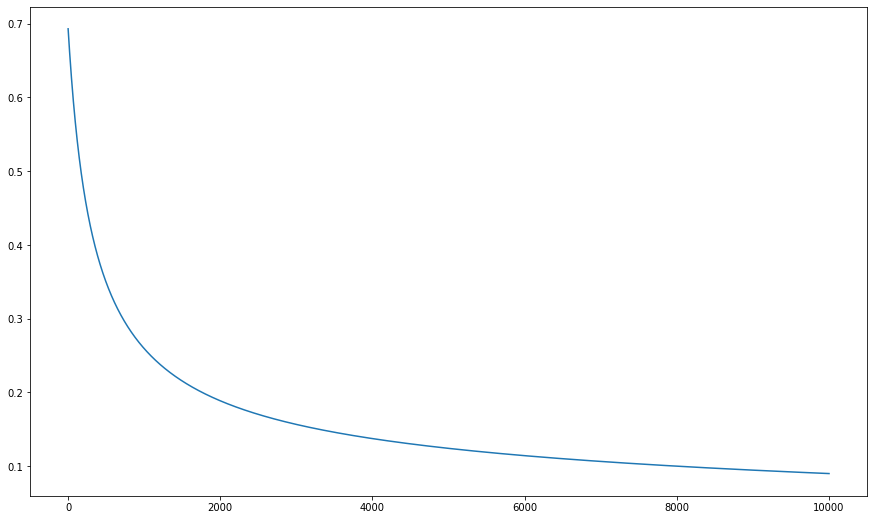

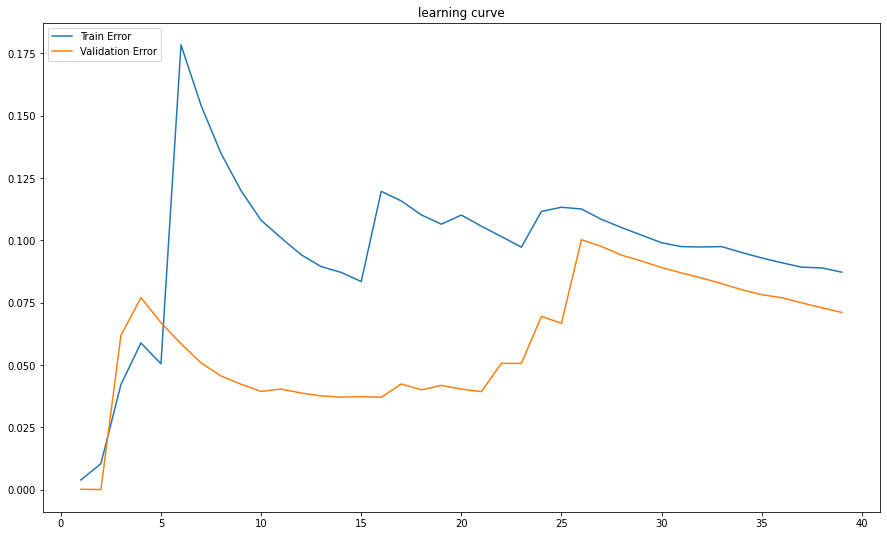

In [176]:
[theta,j_hist] = grad_descent_vec(x_train, y_train, initial_theta,lam, max_itr, alpha)

i=np.arange(1,10001,1)
plt.plot(i,j_hist)
plt.show()

learning_curve(x_train, x_val, y_train, y_val, theta, lam)

In [0]:
print(theta)


In [177]:
[J,h_train]=costFunction(x_train, y_train, theta,lam)

h_train,acc=prediction(h_train,y_train)
print("\naccuracy (train):  ",acc)

[J,h_test]=costFunction(x_test, y_test, theta,lam)

h_test,acc=prediction(h_test,y_test)
print("\naccuracy:  ",acc)


accuracy (train):   98.33333333333333

accuracy:   95.0


In [144]:
for i in range(y_test.shape[0]):
  print( "{}      {} " .format(h_test[i] , y_test[i]))

[0.]      [1.] 
[0.]      [0.] 
[0.]      [0.] 
[1.]      [1.] 
[0.]      [0.] 
[0.]      [0.] 
[0.]      [0.] 
[0.]      [0.] 
[1.]      [1.] 
[1.]      [1.] 
[1.]      [1.] 
[1.]      [1.] 
[0.]      [0.] 
[1.]      [1.] 
[0.]      [0.] 
[0.]      [0.] 
[1.]      [1.] 
[0.]      [0.] 
[1.]      [1.] 
[1.]      [1.] 
[0.]      [0.] 
[0.]      [1.] 
[0.]      [0.] 
[0.]      [0.] 
[1.]      [1.] 
[0.]      [0.] 
[1.]      [1.] 
[0.]      [0.] 
[1.]      [1.] 
[0.]      [0.] 
[0.]      [0.] 
[1.]      [1.] 
[0.]      [0.] 
[0.]      [0.] 
[1.]      [1.] 
[0.]      [0.] 
[0.]      [0.] 
[0.]      [0.] 
[1.]      [1.] 
[1.]      [1.] 
